# 1. Problem Statement
BrightPath Academy is dedicated to fostering academic excellence while supporting the holistic development of its students. However, the school faces several data and insight-related challenges that limit its ability to deliver timely and targeted academic interventions. Despite having access to a rich set of student data, educators often struggle to convert this information into actionable strategies that address individual student needs.
One of the most pressing issues is the delayed identification of at-risk students. Academic struggles are only recognized in the latter part of the school year, reducing the effectiveness of intervention efforts. This delay can result in missed opportunities to provide timely support that could positively influence student outcomes.
Additionally, the school lacks a systematic approach for personalizing support strategies such as tutoring or mentoring. Without analytical insights, interventions tend to be reactive and generalized rather than proactive and tailored to each student’s profile.
The role of extracurricular activities, which play an integral part of BrightPath’s holistic education model, is also not clearly understood in relation to academic performance. While these activities are encouraged, there is insufficient evidence to determine their impact on student success, making it difficult to optimize programming.
Lastly, educators face data overload. Although large volumes of information on student demographics, habits, and performance are collected, they are dispersed across systems and not synthesized into a central platform that can drive data-informed decision-making.


# 2. Hypothesis

## Main Hypothesis
Student academic performance, as classified by the GradeClass variable, can be accurately predicted using a combination of demographic factors, study habits, parental involvement, and participation in extracurricular activities.
Supporting Hypotheses
- **Hypothesis 1**: Tutoring support improves academic outcomes.
Students who receive tutoring are more likely to achieve higher academic performance, as the additional instructional time can address individual learning gaps.

- **Hypothesis 2**: Weekly study time has a positive effect on grades.
Students who dedicate more time to studying on a weekly basis are expected to perform better academically, reflecting the importance of consistent learning effort.

- **Hypothesis 3**: Parental involvement enhances student performance.
Higher levels of parental support are associated with improved academic results, highlighting the role of family engagement in student success.

- **Hypothesis 4**: Participation in extracurricular activities contributes to better academic outcomes.
Involvement in structured activities such as music, sports, or volunteering may foster discipline, time management, and motivation, which in turn support academic achievement.

- **Hypothesis 5**: Absenteeism negatively impacts performance.
Students with frequent absences are likely to fall behind academically due to missed instruction and reduced classroom engagement.

- **Hypothesis 6**: Demographic factors influence academic success.
Variables such as gender, ethnicity, and parental education level may have measurable effects on student performance due to differences in access to resources, support systems, and educational backgrounds.


# 3. Getting the system ready


In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data

In [44]:
df = pd.read_csv("../data/Student_performance_data .csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


# 4. Understanding the Data

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


There is 2392 non null records and all the data types are integers excpet StudyTimeWeekly, GPA, and GradeClass

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


### 4.1 Checking for null values

In [47]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

### 4.2 Checking for duplicate values

In [48]:
df.duplicated().sum()

0

# 5. Exploratory Data analysis

## 5. *i*. Univariate Analysis

In this section, we examine the distribution of each variable individually to understand its nature and range.

- Categorical features (e.g., Gender, Parental Education, Activities) are plotted using countplots.
- Numerical features (e.g., GPA, Study Time, Absences) are analyzed using histograms with KDE curves.
- The target variable, `GradeClass`, shows a fairly balanced distribution, with most students in classes B and C.

### Categorical features

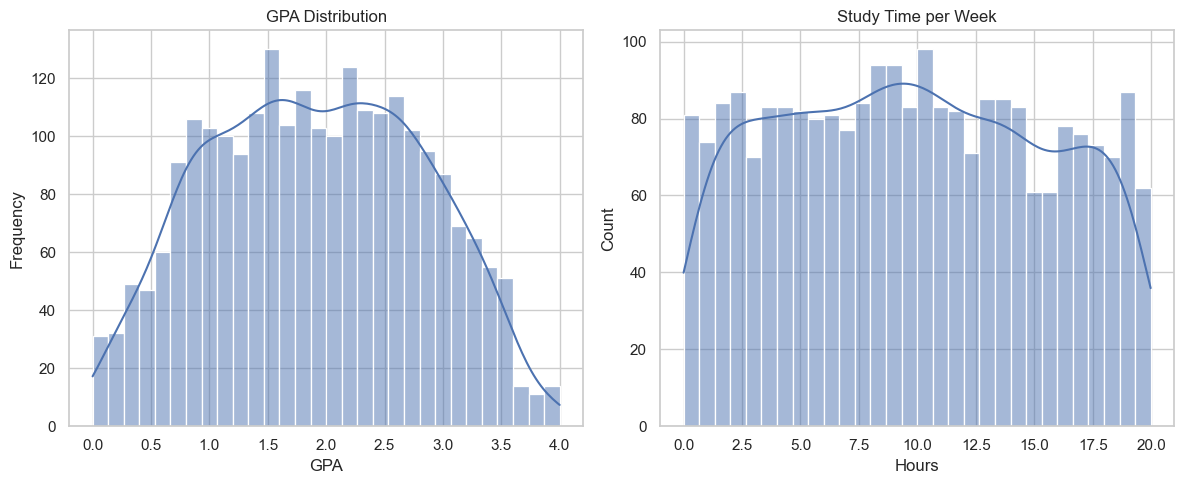

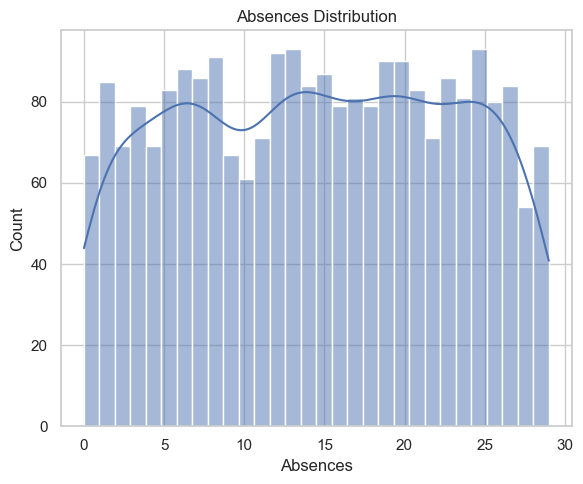

In [49]:

sns.set_theme(style="whitegrid")

# GPA distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(ax=axes[0], data=df, x='GPA', bins=30, kde=True)
axes[0].set_title("GPA Distribution")
axes[0].set_xlabel("GPA")
axes[0].set_ylabel("Frequency")

# Study Time distribution
sns.histplot(ax=axes[1], data=df, x='StudyTimeWeekly', bins=30, kde=True)
axes[1].set_title("Study Time per Week")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Absences distribution
plt.figure(figsize=(6, 5))
sns.histplot(data=df, x='Absences', bins=30, kde=True)
plt.title("Absences Distribution")
plt.xlabel("Absences")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Numerical features

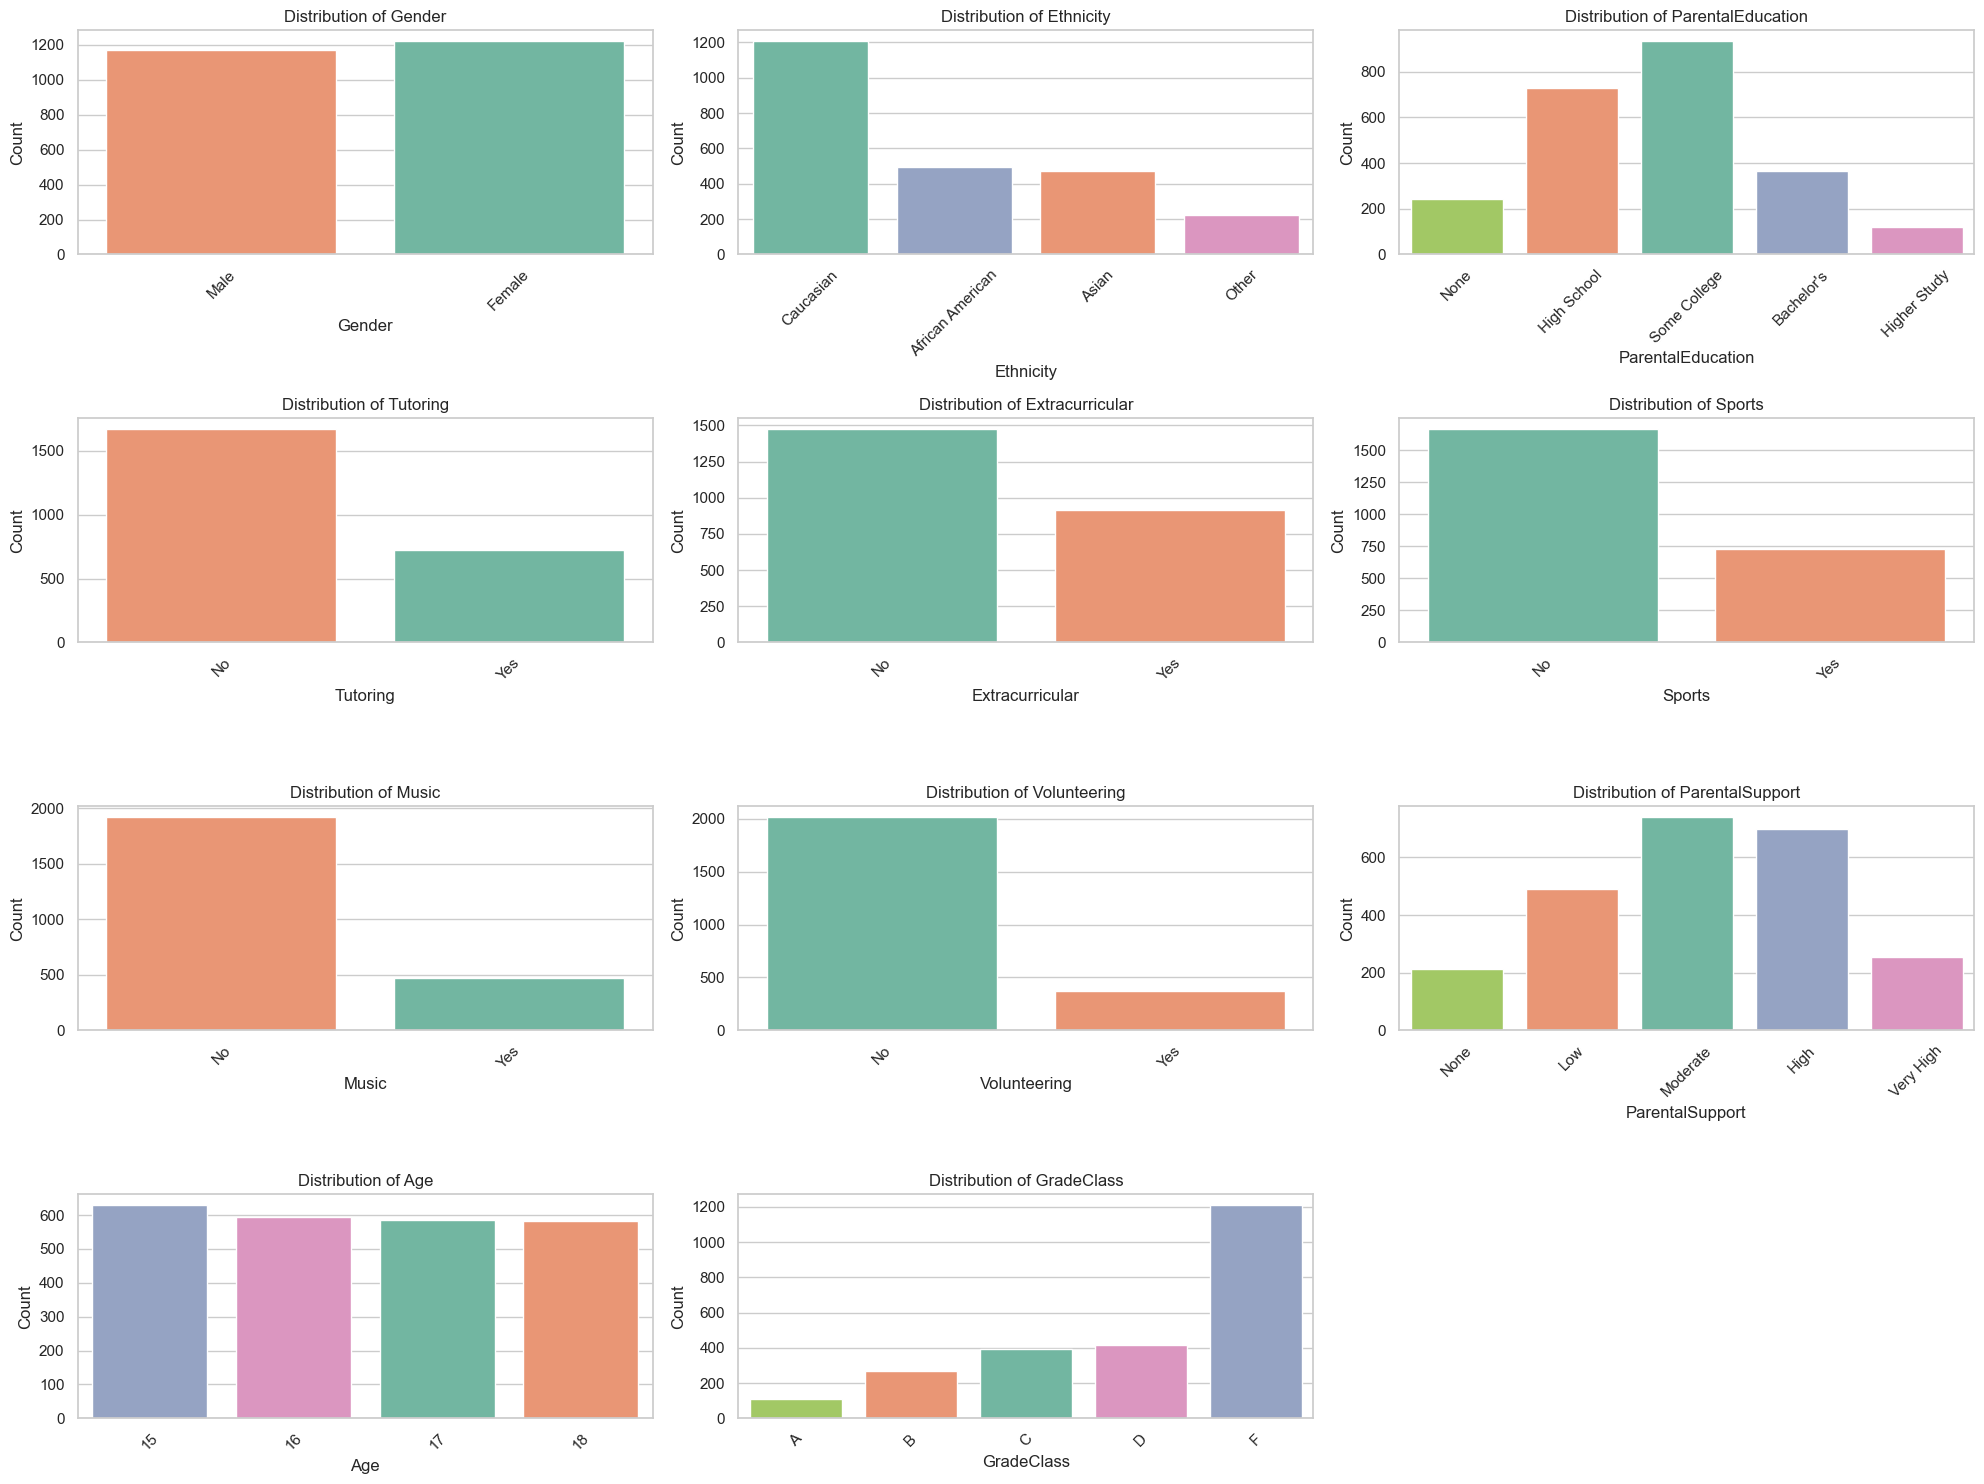

In [51]:
# Mapping and desired orders
label_maps = {
    'Gender': {0: 'Male', 1: 'Female'},
    'Ethnicity': {
        0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'
    },
    'ParentalEducation': {
        0: 'None', 1: 'High School', 2: 'Some College',
        3: "Bachelor's", 4: 'Higher Study'
    },
    'Tutoring': {0: 'No', 1: 'Yes'},
    'Extracurricular': {0: 'No', 1: 'Yes'},
    'Sports': {0: 'No', 1: 'Yes'},
    'Music': {0: 'No', 1: 'Yes'},
    'Volunteering': {0: 'No', 1: 'Yes'},
    'ParentalSupport': {
        0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'
    },
    'Age': {i: str(i) for i in range(15, 19)},
    'GradeClass': {0: 'A',1: 'B',2: 'C',3: 'D',4: 'F'}
}

# Custom order for each variable
category_orders = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'ParentalEducation': ['None', 'High School', 'Some College', "Bachelor's", 'Higher Study'],
    'Tutoring': ['No', 'Yes'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'ParentalSupport': ['None', 'Low', 'Moderate', 'High', 'Very High'],
    'Age': [str(i) for i in range(15, 19)],
    'GradeClass': ['A', 'B', 'C', 'D', 'F']
}

categorical_cols = list(label_maps.keys())

# Map values
df_labeled = df.copy()
for col in categorical_cols:
    df_labeled[col] = df_labeled[col].map(label_maps[col])

# Plot with correct order
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 3, i + 1)
    sns.countplot(
        data=df_labeled,
        x=col,
        hue=col,
        palette="Set2",
        legend=False,
        order=category_orders[col]
    )
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


## 5. *i*. Bivariate analysis